# Desafio 1

H_0:p=67
H_a:p!=67
pvalue=0.1183
trust=0.95
Si p value es menor a 0.05 se rechaza la hipotesis nula. 0.1183>0.05, por lo tanto no existe una diferencia substancial entre ambos porcentajes.

Si p value es menor a 0.01 (confianza 99%) se rechaza la hipotesis nula. Como 0.1183>0.01 se acepta la hipotesis nula

Si p value es menor a 0.1 (confianza 90%) se rechaza la hipotesis nula. Como 0.1183>0.1, la acepta la hipotesis nula.

Por lo tanto no hay una confianza maxima para rechazar la hipotesis nula.

# Desafio 2

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats
import seaborn as sns

df = pd.read_csv("nations.csv")

In [6]:
df

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.00,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.20,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.20,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.20,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.10,33.299999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,190,Samoa,Oceania,4012.600098,10.300000,28.299999,26.75,71.533333,181600,20.666668,0.5010,98.800003,3.10,NaN
190,191,Solomon Islands,Oceania,2249.199951,4.500000,70.300003,36.00,66.500000,503617,17.766666,0.4858,NaN,1.40,NaN
191,192,Tonga,Oceania,4072.199951,10.133333,22.299999,19.25,71.833336,102550,23.266666,0.7150,99.000000,4.85,NaN
192,193,Tuvalu,Oceania,NaN,NaN,23.299999,36.50,66.033333,9767,49.233334,NaN,NaN,NaN,NaN


In [7]:
df['Africa']=np.where(df['region']=='Africa',1,0)
df['Americas']=np.where(df['region']=='Americas',1,0)
df['Asia']=np.where(df['region']=='Asia',1,0)
df['Europe']=np.where(df['region']=='Europe',1,0)
df['Oceania']=np.where(df['region']=='Oceania',1,0)

In [8]:
df

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini,Africa,Americas,Asia,Europe,Oceania
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.00,NaN,1,0,0,0,0
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.20,NaN,1,0,0,0,0
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.20,NaN,1,0,0,0,0
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.20,NaN,1,0,0,0,0
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.10,33.299999,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,190,Samoa,Oceania,4012.600098,10.300000,28.299999,26.75,71.533333,181600,20.666668,0.5010,98.800003,3.10,NaN,0,0,0,0,1
190,191,Solomon Islands,Oceania,2249.199951,4.500000,70.300003,36.00,66.500000,503617,17.766666,0.4858,NaN,1.40,NaN,0,0,0,0,1
191,192,Tonga,Oceania,4072.199951,10.133333,22.299999,19.25,71.833336,102550,23.266666,0.7150,99.000000,4.85,NaN,0,0,0,0,1
192,193,Tuvalu,Oceania,NaN,NaN,23.299999,36.50,66.033333,9767,49.233334,NaN,NaN,NaN,NaN,0,0,0,0,1


# Desafio 3

In [9]:
def hipo(df, variable,binarize):
    tmp1= df[df[binarize]==1].dropna()
    tmp0= df[df[binarize]==0].dropna()
    mean1= tmp1[variable].mean()
    mean0= tmp0[variable].mean()
    ttest=stats.ttest_1samp(tmp1[variable],.7)
    print("La media del grupo 0 es", mean0, ". La media del grupo 1 es", mean1)
    print("La diferencia entre las medias es:",(mean1-mean0))
    print("El valor de t es", ttest[0],"El valor de p es",ttest[1])

hipo(df,'chldmort','Africa')

La media del grupo 0 es 27.931372549019606 . La media del grupo 1 es 116.5625
La diferencia entre las medias es: 88.63112745098039
El valor de t es 10.832889729787537 El valor de p es 1.4290085314925367e-09


# Desafio 4

La diferencia de medias es 85.0017730496454


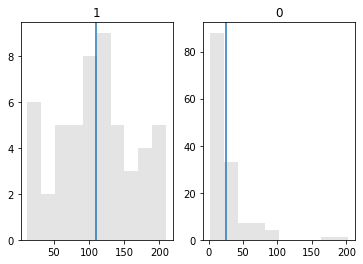

In [23]:
def hist(df,variable,binarize):
    tmp1= df[df[binarize]==1][variable].dropna()
    tmp0= df[df[binarize]==0][variable].dropna()
    mean1=np.mean(tmp1)
    mean0=np.mean(tmp0)
    plt.subplot(1, 2, 1)
    plt.hist(tmp1, alpha=.6, color='lightgrey',label='red')
    plt.title("1")
    plt.axvline(mean1)
    
    plt.subplot(1, 2, 2)
    plt.hist(tmp0, alpha=.6,color='lightgrey',label='red')
    plt.title("0")
    plt.axvline(np.mean(tmp0))
    print("La diferencia de medias es",(mean1-mean0))
    
hist(df,'chldmort','Africa')

La diferencia de medias es -29.7879294755877


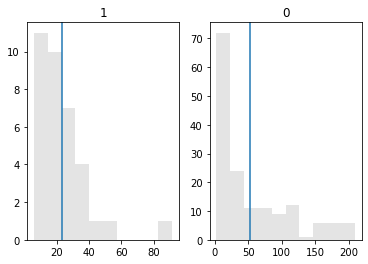

In [24]:
hist(df,'chldmort','Americas')


La diferencia de medias es -14.03721264367816


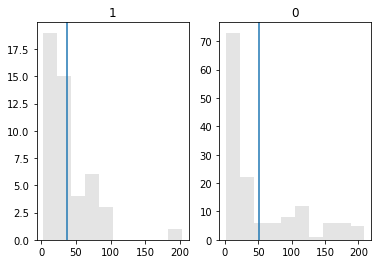

In [25]:
hist(df,'chldmort','Asia')

La diferencia de medias es -52.243488372093026


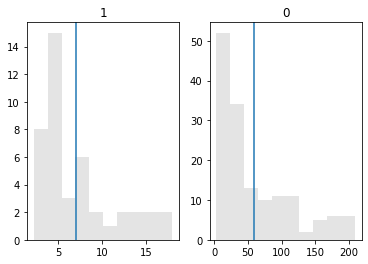

In [26]:
hist(df,'chldmort','Europe')

La diferencia de medias es -8.927434456928843


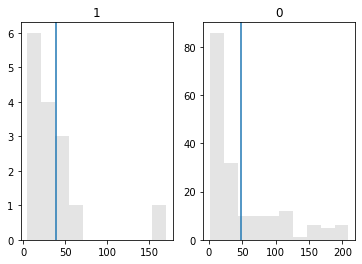

In [27]:
hist(df,'chldmort','Oceania')

En general las medias son diferentes en cada contitente, por lo que se puede decir que la hipotesis nula se rechaza.